In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [151]:
df=pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [152]:
df.info()
# CHALLENGES -- normalized-losses,horsepower
# Convert object(8) kind columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [153]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [154]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [155]:
df["normalized-losses"].value_counts()
# 41 missing values as ? are there in normalized_losses

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

In [156]:
df["horsepower"].value_counts()
#?--2

horsepower
68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: count, dtype: int64

In [157]:
df[df["horsepower"]=="?"]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
130,0,?,renault,gas,wagon,fwd,front,66.5,55.2,ohc,132,?,23,31,9295
131,2,?,renault,gas,hatchback,fwd,front,66.6,50.5,ohc,132,?,23,31,9895


Null Removal

In [159]:
# Null Removal
'''
jay,90.0.,?
raj,?,89.0
'''
df["normalized-losses"]=df["normalized-losses"].replace("?",np.nan)
df["horsepower"]=df["horsepower"].replace("?",np.nan)

In [160]:
#df.info() -- np.nan datatype is float -- so typecasting to float 
df["normalized-losses"]=df["normalized-losses"].astype("float")
df["horsepower"]=df["horsepower"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.2+ KB


In [161]:
# df.isnull().sum() -- total number of missing values
(df.isnull().sum()/len(df))*100 # -- % of missing value

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
width                 0.00000
height                0.00000
engine-type           0.00000
engine-size           0.00000
horsepower            0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 0.00000
dtype: float64

In [162]:
df[["horsepower","normalized-losses"]].describe()
# median<mean -- horsepower -- +vely skewed
# normalized-losses -- median<mean -- +vely skewed

,horsepower,normalized-losses
count,203.000000,164.000000
mean,104.256158,122.000000
std,39.714369,35.442168
min,48.000000,65.000000
25%,70.000000,94.000000
50%,95.000000,115.000000
75%,116.000000,150.000000
max,288.000000,256.000000


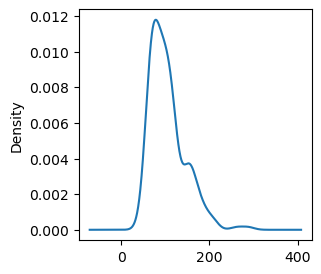

In [163]:
plt.figure(figsize=(3,3))
df["horsepower"].plot(kind="kde")
plt.show()

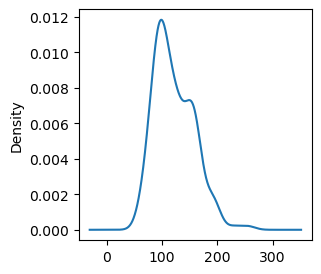

In [164]:
plt.figure(figsize=(3,3))
df["normalized-losses"].plot(kind="kde")
plt.show()

In [165]:
df["normalized-losses"]=df["normalized-losses"].fillna(df["normalized-losses"].median())
df["horsepower"]=df["horsepower"].fillna(df["horsepower"].median())

In [166]:
df["normalized-losses"].median()

115.0

In [167]:
# Outlier Removal

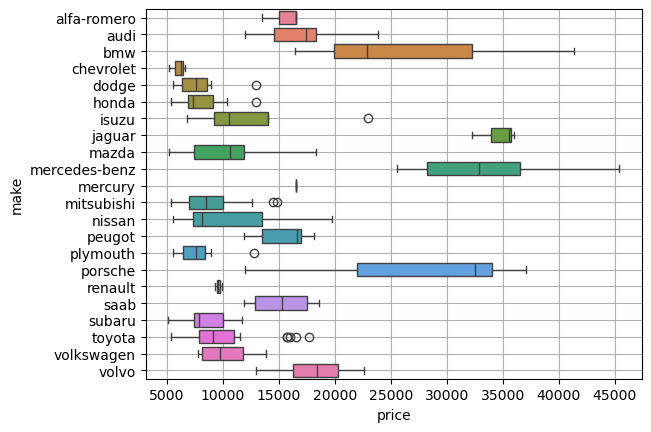

In [168]:
sns.boxplot(data=df,y="make",x="price",hue="make")
plt.grid()
plt.show()
# Challenges--



<Axes: xlabel='price'>

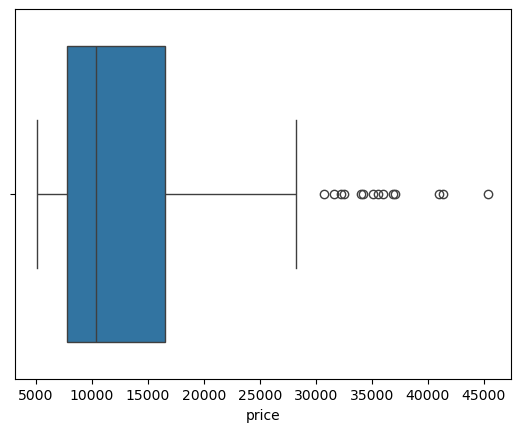

In [169]:
sns.boxplot(data=df,x="price")

In [170]:
'''
dodge -- >10000
honda -- >13000
isuzu -- >20000
mitsubishi -- >13000
plymouth -->10000
toyota -- >15000
'''
i=df[(df["make"]=="dodge")&(df["price"]>10000)].index
df.drop(i,axis=0,inplace=True)

In [171]:
i=df[(df["make"]=="honda")&(df["price"]>13000)].index
df.drop(i,axis=0,inplace=True)

i=df[(df["make"]=="isuzu")&(df["price"]>20000)].index
df.drop(i,axis=0,inplace=True)

i=df[(df["make"]=="mitsubishi")&(df["price"]>13000)].index
df.drop(i,axis=0,inplace=True)

i=df[(df["make"]=="plymouth")&(df["price"]>10000)].index
df.drop(i,axis=0,inplace=True)

i=df[(df["make"]=="toyota")&(df["price"]>15000)].index
df.drop(i,axis=0,inplace=True)

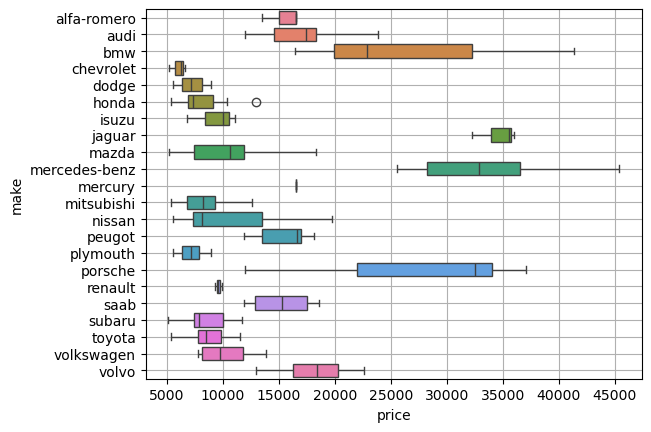

In [172]:
sns.boxplot(data=df,y="make",x="price",hue="make")
plt.grid()
plt.show()

In [173]:
i=df[(df["make"]=="honda")&(df["price"]>12500)].index
df.drop(i,axis=0,inplace=True)

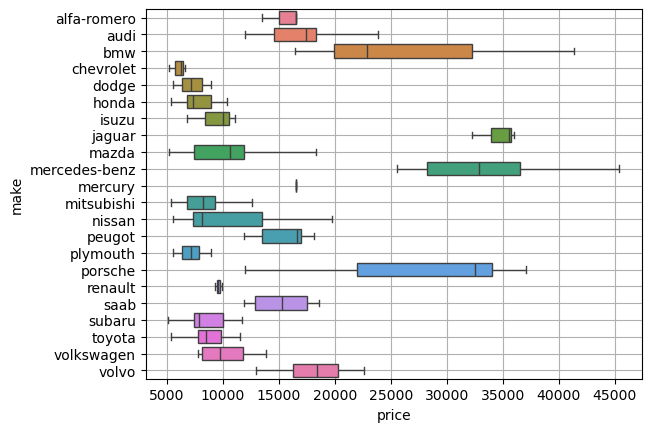

In [174]:
sns.boxplot(data=df,y="make",x="price",hue="make")
plt.grid()
plt.show()

In [175]:
# Skewness removal

In [176]:
from scipy.stats import skew

In [177]:
c=df.select_dtypes(["float64","int64"]).columns
c

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [178]:
for i in c:
    print(i," : ",skew(df[i]))
# challenges--
'''
normalized-losses  :  0.9632059441735282
width  :  0.9140400320504322
engine-size  :  2.0541257626466156
horsepower  :  1.5620892525023995
price  :  1.8166794702973463

'''

symboling  :  0.21386866184357742
normalized-losses  :  0.9632059441735282
width  :  0.9140400320504322
height  :  0.013839962443639326
engine-size  :  2.0541257626466156
horsepower  :  1.5620892525023995
city-mpg  :  0.5999073033714895
highway-mpg  :  0.4760310091695327
price  :  1.8166794702973463


'\nnormalized-losses  :  0.9632059441735282\nwidth  :  0.9140400320504322\nengine-size  :  2.0541257626466156\nhorsepower  :  1.5620892525023995\nprice  :  1.8166794702973463\n\n'

symboling  :  0.21386866184357742


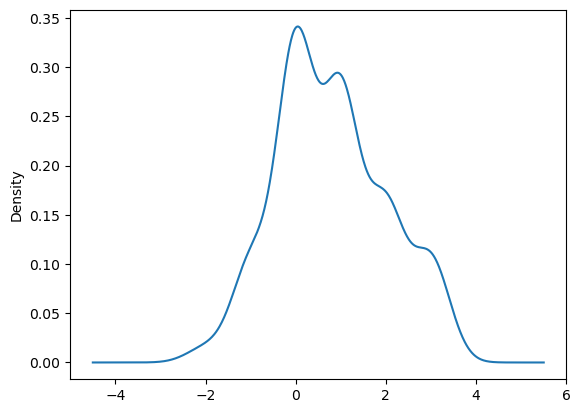

normalized-losses  :  0.9632059441735282


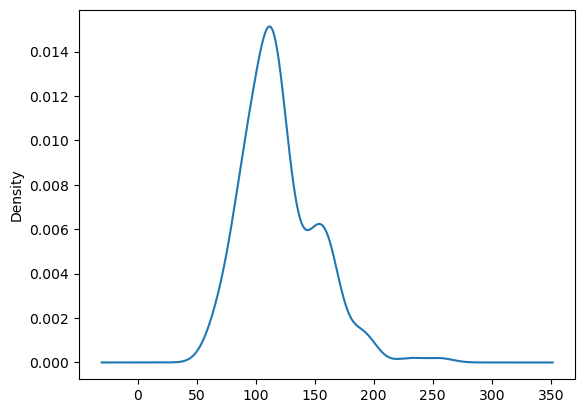

width  :  0.9140400320504322


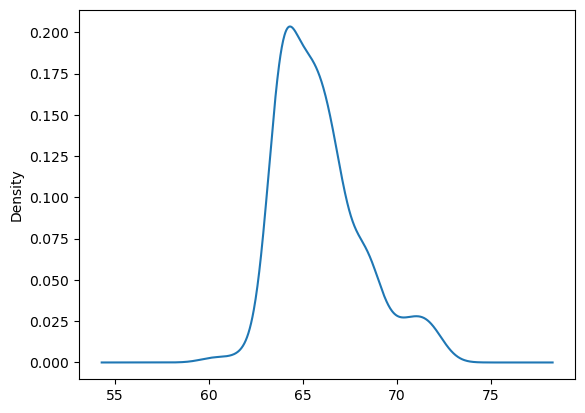

height  :  0.013839962443639326


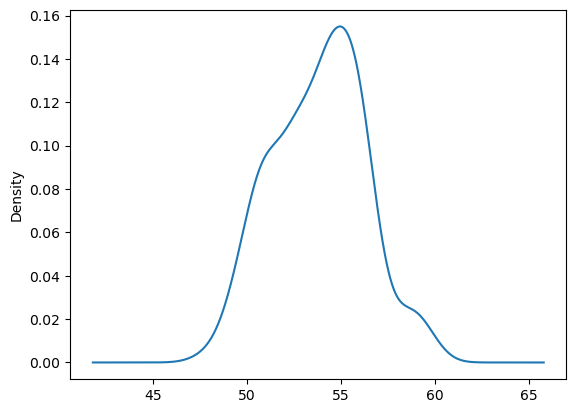

engine-size  :  2.0541257626466156


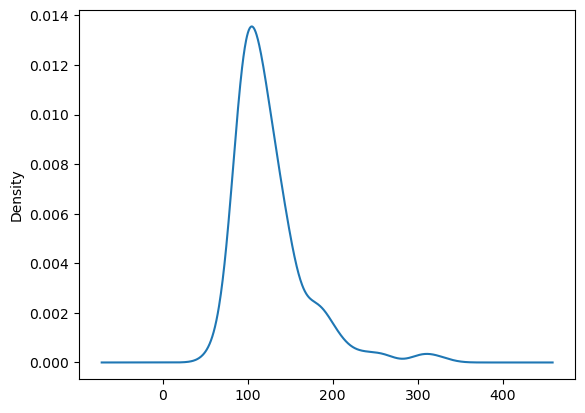

horsepower  :  1.5620892525023995


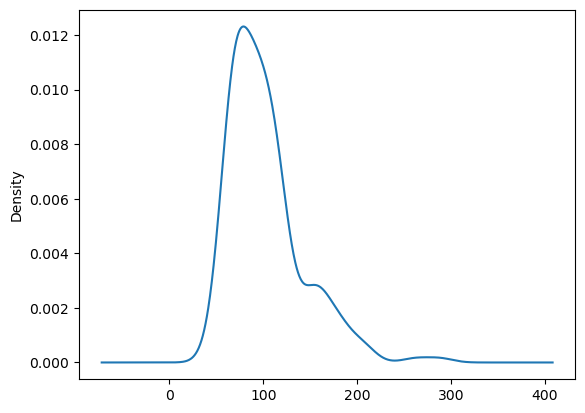

city-mpg  :  0.5999073033714895


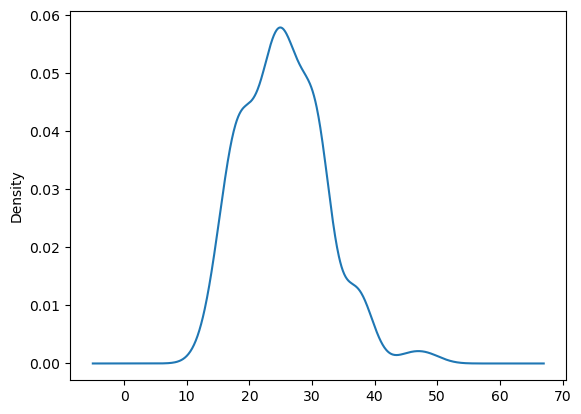

highway-mpg  :  0.4760310091695327


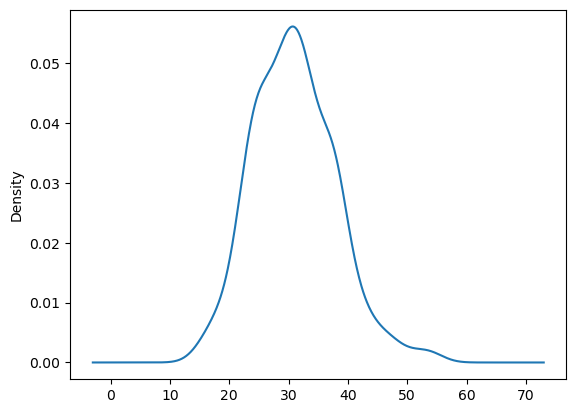

price  :  1.8166794702973463


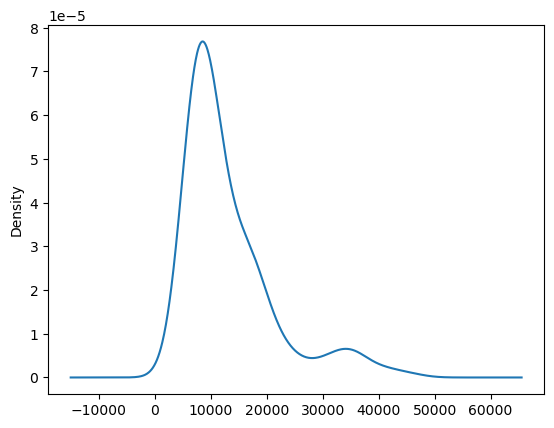

In [179]:
for i in c:
    print(i," : ",skew(df[i]))
    df[i].plot(kind="kde")
    plt.show()

In [180]:
np.sqrt(25)

5.0

In [181]:
np.log(25)

3.2188758248682006

In [182]:
np.sqrt(-25)

nan

In [183]:
np.log(-25)

nan

In [184]:
df[c].corr()["price"].sort_values()
"""
highly negatively correlated -- 
highway-mpg         -0.704846
city-mpg            -0.680412
highly +vely correlated --
width                0.730503
horsepower           0.769844
engine-size          0.869638

---
normalized-losses  :  0.9632059441735282


"""

'\nhighly negatively correlated -- \nhighway-mpg         -0.704846\ncity-mpg            -0.680412\nhighly +vely correlated --\nwidth                0.730503\nhorsepower           0.769844\nengine-size          0.869638\n\n---\nnormalized-losses  :  0.9632059441735282\n\n\n'

In [185]:
df["symboling"].value_counts()

symboling
 0    65
 1    54
 2    31
 3    21
-1    20
-2     3
Name: count, dtype: int64

0.1482590319675759


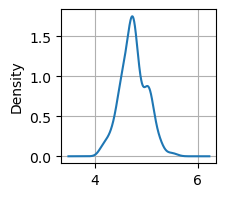

In [186]:
df["normalized-losses"]=np.log(df["normalized-losses"])
print(skew(df["normalized-losses"]))
plt.figure(figsize=(2,2))
df["normalized-losses"].plot(kind="kde")
plt.grid()
plt.show()

In [187]:
# Handling Categorical Data

In [188]:
df["normalized-losses"]

0      4.744932
1      4.744932
2      4.744932
3      5.099866
4      5.099866
         ...   
200    4.553877
201    4.553877
202    4.553877
203    4.553877
204    4.553877
Name: normalized-losses, Length: 194, dtype: float64

In [189]:
z=df.select_dtypes("object").columns
z

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [190]:
df['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 194, dtype: object

In [191]:
df['fuel-type'].value_counts()

fuel-type
gas       174
diesel     20
Name: count, dtype: int64

In [192]:
pd.get_dummies(df['fuel-type']).astype("int")

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [193]:
pd.get_dummies(df['make']).astype("int")

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [194]:
#LABEL ENCODING

In [195]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
e=le.fit_transform(df["make"])
e

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21])

In [196]:
le.classes_

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [197]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[z]=oe.fit_transform(df[z])
df[z]

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0.0,1.0,0.0,2.0,0.0,0.0
1,0.0,1.0,0.0,2.0,0.0,0.0
2,0.0,1.0,2.0,2.0,0.0,5.0
3,1.0,1.0,3.0,1.0,0.0,3.0
4,1.0,1.0,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...
200,21.0,1.0,3.0,2.0,0.0,3.0
201,21.0,1.0,3.0,2.0,0.0,3.0
202,21.0,1.0,3.0,2.0,0.0,5.0
203,21.0,0.0,3.0,2.0,0.0,3.0


In [198]:
df[z]

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0.0,1.0,0.0,2.0,0.0,0.0
1,0.0,1.0,0.0,2.0,0.0,0.0
2,0.0,1.0,2.0,2.0,0.0,5.0
3,1.0,1.0,3.0,1.0,0.0,3.0
4,1.0,1.0,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...
200,21.0,1.0,3.0,2.0,0.0,3.0
201,21.0,1.0,3.0,2.0,0.0,3.0
202,21.0,1.0,3.0,2.0,0.0,5.0
203,21.0,0.0,3.0,2.0,0.0,3.0


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   make               194 non-null    float64
 3   fuel-type          194 non-null    float64
 4   body-style         194 non-null    float64
 5   drive-wheels       194 non-null    float64
 6   engine-location    194 non-null    float64
 7   width              194 non-null    float64
 8   height             194 non-null    float64
 9   engine-type        194 non-null    float64
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
 14  price              194 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 24.2 KB


In [200]:
df[z]

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0.0,1.0,0.0,2.0,0.0,0.0
1,0.0,1.0,0.0,2.0,0.0,0.0
2,0.0,1.0,2.0,2.0,0.0,5.0
3,1.0,1.0,3.0,1.0,0.0,3.0
4,1.0,1.0,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...
200,21.0,1.0,3.0,2.0,0.0,3.0
201,21.0,1.0,3.0,2.0,0.0,3.0
202,21.0,1.0,3.0,2.0,0.0,5.0
203,21.0,0.0,3.0,2.0,0.0,3.0


In [201]:
# Data Scaling

In [202]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
m=mn.fit_transform(df.iloc[:,:-1])
m

array([[1.        , 0.41621604, 0.        , ..., 0.2625    , 0.22222222,
        0.28947368],
       [1.        , 0.41621604, 0.        , ..., 0.2625    , 0.22222222,
        0.28947368],
       [0.6       , 0.41621604, 0.        , ..., 0.44166667, 0.16666667,
        0.26315789],
       ...,
       [0.2       , 0.27684005, 1.        , ..., 0.35833333, 0.13888889,
        0.18421053],
       [0.2       , 0.27684005, 1.        , ..., 0.24166667, 0.36111111,
        0.28947368],
       [0.2       , 0.27684005, 1.        , ..., 0.275     , 0.16666667,
        0.23684211]])

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,:-1]=scaler.fit_transform(df.iloc[:,:-1])
df.iloc[:,:-1]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.846173,-0.044137,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.220974,-0.675762,-0.580474
1,1.846173,-0.044137,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.220974,-0.675762,-0.580474
2,0.176441,-0.044137,-1.934007,0.339032,-0.748984,1.234608,-0.125327,-0.179636,-0.582442,1.943631,0.628957,1.317561,-0.982065,-0.726156
3,1.011307,1.361717,-1.774620,0.339032,0.432341,-0.566249,-0.125327,0.140924,0.195695,-0.078162,-0.396602,-0.008544,-0.216307,-0.143429
4,1.011307,1.361717,-1.774620,0.339032,0.432341,-2.367105,-0.125327,0.232512,0.195695,-0.078162,0.247354,0.322982,-1.135217,-1.308883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.493292,-0.800884,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.366605,0.297480,-0.369459,-0.434792
201,-1.493292,-0.800884,1.413123,0.339032,0.432341,1.234608,-0.125327,1.331576,0.687151,-0.078162,0.366605,1.470573,-0.982065,-0.871838
202,-1.493292,-0.800884,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,1.943631,1.129812,0.807521,-1.135217,-1.163201
203,-1.493292,-0.800884,1.413123,-2.949576,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.462006,0.093464,0.089996,-0.580474


In [204]:
df.describe()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
count,1.940000e+02,1.940000e+02,194.000000,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,194.000000
mean,4.578239e-17,-2.435623e-15,0.000000,-5.493887e-17,7.325183e-17,-4.578239e-18,9.156479e-18,5.544248e-15,-1.245281e-15,-2.014425e-16,-3.204767e-17,-3.204767e-17,2.289120e-16,2.426467e-16,13087.304124
std,1.002587e+00,1.002587e+00,1.002587,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,8075.197621
min,-2.328158e+00,-2.303999e+00,-1.934007,-2.949576e+00,-3.111634e+00,-2.367105e+00,-1.253268e-01,-2.560941e+00,-2.466354e+00,-3.110852e+00,-1.541412e+00,-1.385654e+00,-1.900975e+00,-2.182973e+00,5118.000000
25%,-6.584255e-01,-5.583055e-01,-0.658910,3.390318e-01,-7.489843e-01,-5.662488e-01,-1.253268e-01,-8.665512e-01,-7.462605e-01,-7.816211e-02,-6.828046e-01,-8.246096e-01,-9.437771e-01,-8.718376e-01,7747.250000
50%,1.764408e-01,-4.413678e-02,-0.021361,3.390318e-01,4.323405e-01,-5.662488e-01,-1.253268e-01,-2.254308e-01,1.137863e-01,-7.816211e-02,-3.727518e-01,-1.870587e-01,-6.315531e-02,-7.058806e-02,9992.000000
75%,1.011307e+00,6.492112e-01,1.094349,3.390318e-01,4.323405e-01,1.234608e+00,-1.253268e-01,4.614840e-01,7.588213e-01,-7.816211e-02,3.606423e-01,3.484840e-01,7.026028e-01,7.306615e-01,16500.000000
max,1.846173e+00,3.125542e+00,1.413123,3.390318e-01,1.613665e+00,1.234608e+00,7.979139e+00,2.934377e+00,2.448199e+00,2.954528e+00,4.778895e+00,4.734834e+00,3.612483e+00,3.352933e+00,45400.000000


In [205]:
c=["apple","ball","chota apple"] # variable packing
x,y,z=c # variable unpacking
print(x)
print(y)
print(z)

apple
ball
chota apple


In [206]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,1.846173,-0.044137,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.220974,-0.675762,-0.580474,13495
1,1.846173,-0.044137,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.220974,-0.675762,-0.580474,16500


In [207]:
features=df.drop("price",axis=1)
target=df["price"]

In [208]:
print(features.shape)
print(target.shape)

(194, 14)
(194,)


In [209]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=10,test_size=0.25)

In [210]:
print(f"Training data : {xtrain.shape, ytrain.shape}" )
print(f"Testing data : {xtest.shape, ytest.shape}" )

Training data : ((145, 14), (145,))
Testing data : ((49, 14), (49,))


In [211]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [324]:
print(f"Coef : {lr.coef_}, Intercept : {lr.intercept_}")

Coef : [  708.21950991  -213.61771667 -1329.76446647  -305.70575829
    45.12356114  1140.16803928  1905.08634399  1228.79370167
   914.48702283   456.92511647  4422.27124667   232.56296665
  2524.30536564 -3445.2584401 ], Intercept : 13278.645292651314


In [212]:
ypred=lr.predict(xtest)

In [213]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print("Mean Square error i.e. error in prediction of each point : ",mse)
print("R2 Score : ",r2)

Mean Square error i.e. error in prediction of each point :  11409087.69255347
R2 Score :  0.8341765497131626


In [214]:
lr.score(xtrain,ytrain)

0.8649900971088806

In [215]:
lr.score(xtest,ytest)

0.8341765497131626

In [216]:
'''
training score>testing score -- case of overfitting
testing score>training score -- case of underfitting.
Underfitting-- increase number of features, do feature engineering, connect with client for more data.
overfitting -- regularization -- to add external error during training time.
2 types of regularization -- 
L1(Lasso Regularization) := Residual error(RSS)+lambda*(sum(abs(all slopes)))
lambda -- 200-1000
L2(Ridge Regularization) := Residual error(RSS)+lambda*(sum(all slopes)**2)
lambda -- 1-50
'''

'\ntraining score>testing score -- case of overfitting\ntesting score>training score -- case of underfitting.\nUnderfitting-- increase number of features, do feature engineering, connect with client for more data.\noverfitting -- regularization -- to add external error during training time.\n2 types of regularization -- \nL1(Lasso Regularization) := Residual error(RSS)+lambda*(sum(abs(all slopes)))\nlambda -- 200-1000\nL2(Ridge Regularization) := Residual error(RSS)+lambda*(sum(all slopes)**2)\nlambda -- 1-50\n'

In [217]:
from sklearn.linear_model import Lasso

In [218]:
#hyperparameter tuning
for i in range(200,1001):
    l1=Lasso(i) # hyperparameter tuning
    l1.fit(xtrain,ytrain)
    score_test=l1.score(xtest,ytest)
    score_train=l1.score(xtrain,ytrain)
    print(f"i : {i}  train :{score_train} test : {score_test}")
    

i : 200  train :0.8532953459574267 test : 0.8742238816577161
i : 201  train :0.8532265324595483 test : 0.8742842983163639
i : 202  train :0.8531573757772862 test : 0.874344109766726
i : 203  train :0.8530878759106404 test : 0.8744033160088025
i : 204  train :0.8530180328596109 test : 0.8744619170425932
i : 205  train :0.8529478466241976 test : 0.8745199128680983
i : 206  train :0.8528773172044007 test : 0.8745773034853175
i : 207  train :0.8528064446002201 test : 0.8746340888942511
i : 208  train :0.8527352288116559 test : 0.874690269094899
i : 209  train :0.8526636698387079 test : 0.8747458440872611
i : 210  train :0.8525917676813761 test : 0.8748008138713375
i : 211  train :0.8525195223396608 test : 0.8748551784471281
i : 212  train :0.8524469338135616 test : 0.8749089378146331
i : 213  train :0.8523740021030789 test : 0.8749620919738524
i : 214  train :0.8523007272082124 test : 0.8750146409247859
i : 215  train :0.8522271091289622 test : 0.8750665846674337
i : 216  train :0.85215314

In [219]:
l1=Lasso(201) # hyperparameter tuning
l1.fit(xtrain,ytrain)
score_test=l1.score(xtest,ytest)
score_train=l1.score(xtrain,ytrain)
print(f"train :{score_train} test : {score_test}")

train :0.8532265324595483 test : 0.8742842983163639


In [220]:
dict={"Input":xtrain.columns,"Slope after applying Lasso" : l1.coef_}
d=pd.DataFrame(dict)
d

,Input,Slope after applying Lasso
0,symboling,85.051578
1,normalized-losses,-0.000000
2,make,-1002.014896
3,fuel-type,-279.712463
4,body-style,-0.000000
5,drive-wheels,872.146343
6,engine-location,1476.312460
7,width,1125.002776
8,height,472.002002
9,engine-type,221.078192


In [221]:
from sklearn.linear_model import Ridge
for i in range(0,51):
    l2=Ridge(i) # hyperparameter tuning
    l2.fit(xtrain,ytrain)
    score_test=l2.score(xtest,ytest)
    score_train=l2.score(xtrain,ytrain)
    print(f"i : {i}  train :{score_train} test : {score_test}")

i : 0  train :0.8649900971088808 test : 0.8341765497131628
i : 1  train :0.8646199053162857 test : 0.8423214674303129
i : 2  train :0.8639458573744035 test : 0.8480272387254635
i : 3  train :0.8632032205938329 test : 0.8524502757132899
i : 4  train :0.862447828927047 test : 0.8560730190985555
i : 5  train :0.8616938495184814 test : 0.8591390381074537
i : 6  train :0.8609444869105184 test : 0.8617886703197755
i : 7  train :0.8602000063302259 test : 0.8641109013045933
i : 8  train :0.8594599951472419 test : 0.8661663309211073
i : 9  train :0.8587239952809103 test : 0.86799853249713
i : 10  train :0.8579916523980611 test : 0.8696401840278354
i : 11  train :0.8572627249515087 test : 0.8711166194797537
i : 12  train :0.8565370590004238 test : 0.8724480085331691
i : 13  train :0.8558145605701839 test : 0.8736507605696442
i : 14  train :0.8550951736262749 test : 0.8747384663724997
i : 15  train :0.8543788644215938 test : 0.875722551809146
i : 16  train :0.8536656110359524 test : 0.87661274508

In [296]:
l2=Ridge(7) # hyperparameter tuning
l2.fit(xtrain,ytrain)
score_test=l2.score(xtest,ytest)
score_train=l2.score(xtrain,ytrain)
print(f"train :{score_train} test : {score_test}")

train :0.8602000063302259 test : 0.8641109013045933


In [302]:
dict={"Input":xtrain.columns,"Slope after Ridge" : l2.coef_,"Slope after Lasso" : l1.coef_,
     "Slope after Linear Regression" : lr.coef_}
d=pd.DataFrame(dict)
d

,Input,Slope after Ridge,Slope after Lasso,Slope after Linear Regression
0,symboling,438.003854,85.051578,708.219510
1,normalized-losses,-186.543130,-0.000000,-213.617717
2,make,-1300.861220,-1002.014896,-1329.764466
3,fuel-type,-474.192913,-279.712463,-305.705758
4,body-style,-141.661510,-0.000000,45.123561
5,drive-wheels,1108.741624,872.146343,1140.168039
6,engine-location,1642.224785,1476.312460,1905.086344
7,width,1240.475414,1125.002776,1228.793702
8,height,932.853848,472.002002,914.487023
9,engine-type,462.287888,221.078192,456.925116


In [ ]:
# cross valiodation : 

In [314]:
from sklearn.model_selection import cross_val_score
l1=Lasso(201)
scores = cross_val_score(l1, features, target, cv=5)
scores

array([0.73761929, 0.85210614, 0.28729465, 0.43518391, 0.53806298])

In [316]:
np.mean(scores).round(2)

0.57

In [318]:
from sklearn.model_selection import cross_val_score
l2=Ridge(7)
scores = cross_val_score(l2, features, target, cv=5)
scores

array([0.76162418, 0.8414747 , 0.13096453, 0.47560601, 0.54921468])

In [320]:
np.mean(scores).round(2)

0.55

In [322]:
scores = cross_val_score(lr, features, target, cv=5)
scores

array([0.75221711, 0.88116798, 0.0351461 , 0.45415399, 0.48380933])

In [326]:
np.mean(scores).round(2)

0.52

In [ ]:
# 